## BUSINESS PROBLEM

In today's digital age, e-commerce platforms face the challenge of analyzing vast amounts of customer feedback to understand product sentiment accurately. Understanding customer sentiment is crucial for businesses to make informed decisions about product improvements, marketing strategies, and customer satisfaction. However, manually analyzing thousands of product reviews is time-consuming and inefficient. Therefore, The company aims to develop a robust automated sentiment analysis system to process and interpret these reviews efficiently for e-commerce product reviews, specifically targeting the Electronics category on Amazon.

## PROJECT OBJECTIVE

By leveraging Data Science techniques, the objective of this project is to build an end-to-end solution that can extract, preprocess, analyze, and visualize customer sentiment from textual reviews. This analysis involves the challenge of efficiently processing large volumes of textual data and accurately interpreting the nuanced emotions expressed. A successful sentiment analysis and modeling implementation will significantly contribute to increasing customer trust and loyalty, thereby driving business growth.

### IMPORT LIBRARIES

In [1]:
pip install pandas numpy scikit-learn nltk textblob imbalanced-learn transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\kaoth\new_amazon\Scripts\python.exe -m pip install --upgrade pip


In [2]:
#Import libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


### LOAD DATASET

In [3]:
data = pd.read_csv('Internship.csv')

# Make a copy of the dataset
data1 = data.copy()

###  DATA OVERVIEW

In [5]:
# Check the first 5 rows
data.head()


,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...","Tuesday, June 4, 2024"
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,"Tuesday, June 4, 2024"
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...","Monday, June 3, 2024"
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,"Sunday, June 2, 2024"
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,"Tuesday, June 4, 2024"


In [6]:
# Check the dimensionality of the data
data.shape

(12000, 6)

In [7]:
# View summary of the dataset and check for anomalies
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Reviewer     11997 non-null  object
 1   Country      11997 non-null  object
 2   StarRatings  12000 non-null  int64 
 3   Subject      12000 non-null  object
 4   Review       11161 non-null  object
 5   Date_posted  12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


In [8]:
# Inspect data types
data.dtypes

Reviewer       object
Country        object
StarRatings     int64
Subject        object
Review         object
Date_posted    object
dtype: object

In [9]:
# Check statistical description of numerical feature
data.describe()

,StarRatings
count,12000.000000
mean,2.677500
std,1.897224
min,1.000000
25%,1.000000
50%,1.000000
75%,5.000000
max,5.000000


In [10]:
# Check statistical description of categorical feature
data.describe(include = 'object')

,Reviewer,Country,Subject,Review,Date_posted
count,11997,11997,12000,11161,12000
unique,11065,147,11177,11158,1372
top,customer,GB,I'm very satisfied,Just today I received an email saying my dispu...,"Monday, September 28, 2020"
freq,52,2733,22,2,39


In [11]:
# Check the number unique values in each features
data.nunique()

Reviewer       11065
Country          147
StarRatings        5
Subject        11177
Review         11158
Date_posted     1372
dtype: int64

In [12]:
# Check for duplicates
data.duplicated().sum()

0

In [13]:
# Check for missing values
data.isnull().sum()

Reviewer         3
Country          3
StarRatings      0
Subject          0
Review         839
Date_posted      0
dtype: int64

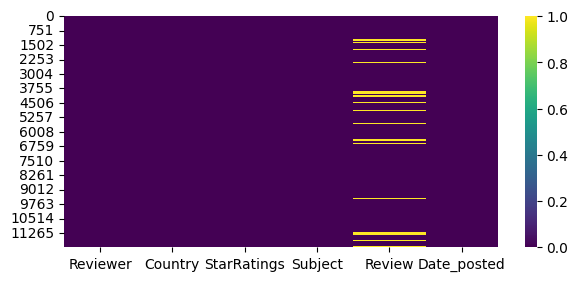

In [14]:
# Visualize missing values
plt.figure(figsize=(7,3))
sns.heatmap(data.isnull(),cbar=True, cmap="viridis");

In [15]:
# Replace missing Reviewer and Country with placeholders
data['Reviewer'].fillna('Unknown', inplace=True)
data['Country'].fillna('Not Provided', inplace=True)

# Drop rows where Review is missing
data.dropna(subset=['Review'], inplace=True)

# Check the resulting dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11161 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Reviewer     11161 non-null  object
 1   Country      11161 non-null  object
 2   StarRatings  11161 non-null  int64 
 3   Subject      11161 non-null  object
 4   Review       11161 non-null  object
 5   Date_posted  11161 non-null  object
dtypes: int64(1), object(5)
memory usage: 610.4+ KB
None


In [16]:
# Check the column features
print(f"Feature Names: {data.columns.values}")

Feature Names: ['Reviewer' 'Country' 'StarRatings' 'Subject' 'Review' 'Date_posted']


In [17]:
# Convert the date_posted from object to pandas datetime function 
data["Date_posted"] = pd.to_datetime(data["Date_posted"])
data.head()

,Reviewer,Country,StarRatings,Subject,Review,Date_posted
0,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","Amazon is easy to work with, but they fulfill ...",2024-06-04
1,Arthur Riding,GB,5,"Great range of products, generally superior qu...",I have been using AliExpress for well over a y...,2024-06-04
2,UK shopper Val,GB,5,Good!,"A good, customer-centric marketplace. But neve...",2024-06-03
3,Jim Corkery,CA,1,I purchased an Android Tesla style…,I purchased an Android Tesla style radio.\nAft...,2024-06-02
4,chris bardin,IE,1,They are an absolute con job dont waste…,They are an absolute con job dont waste your m...,2024-06-04


## Explorative Data Analysi

In [19]:
# Check Customers' reviews texts in the Review column
data['Country'].value_counts()

Country
GB    2689
US    1882
CA     732
AU     556
NL     342
      ... 
AG       1
AX       1
GF       1
BW       1
HM       1
Name: count, Length: 145, dtype: int64

In [20]:
# StarRatings Value Count
data['StarRatings'].value_counts()

StarRatings
1    6360
5    3750
2     403
4     376
3     272
Name: count, dtype: int64

StarRatings
1    6360
2     403
3     272
4     376
5    3750
Name: count, dtype: int64


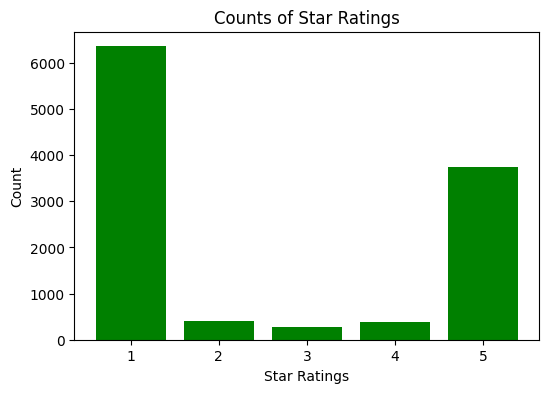

In [21]:
# Check Customers' StarRatings
star_ratings_count = data['StarRatings'].value_counts().sort_index()

print(star_ratings_count)

# Plot the StarRatings counts
plt.figure(figsize=(6, 4))
plt.bar(star_ratings_count.index.astype(str), star_ratings_count.values, color='green')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.title('Counts of Star Ratings')
plt.show()

StarRatings
1    56.98
5    33.60
2     3.61
4     3.37
3     2.44
Name: count, dtype: float64


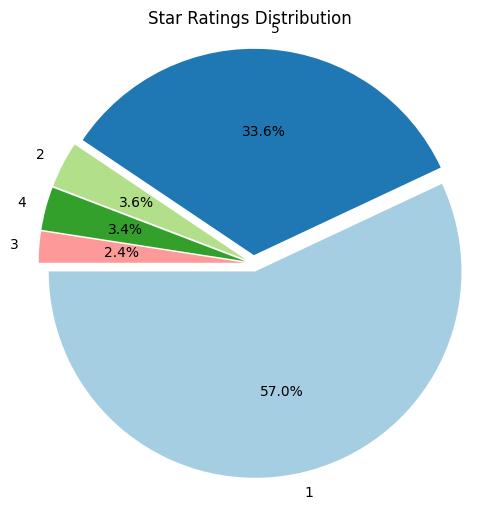

In [22]:
# Percentage Distribution of StarRatings
star_ratings = round(data['StarRatings'].value_counts()/data.shape[0]*100,2)
print(star_ratings)

# Plot pie chart for the star ratings distribution
explode = [0.04] * len(star_ratings)
plt.figure(figsize=(6, 6))
plt.pie(star_ratings, labels=star_ratings.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors, 
        explode=explode)
plt.title('Star Ratings Distribution')
plt.axis('equal')
plt.show()

Top 10 countries with high StarRatings (3-5 StarRatings):
    Country  HighRatingsCount
121      US               550
38       GB               498
19       CA               239
5        AU               218
15       BR               185
86       NL               177
35       ES               167
37       FR               159
52       IL               147
89       NZ               135


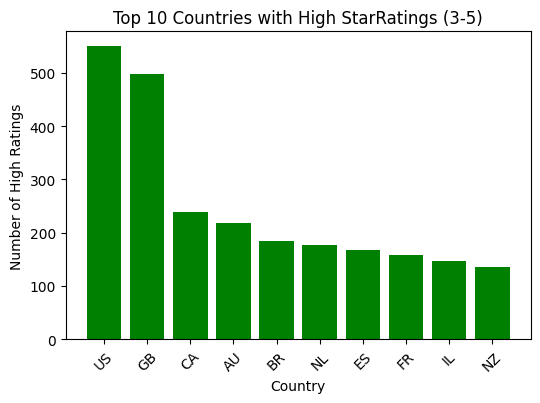

In [23]:
# Top 10 Countries with high StarRatings (3-5)

# Filter reviews with high StarRatings (3-5)
high_ratings = data[data['StarRatings'].between(3, 5)]

# Group by 'Country' and count the number of high ratings for each country
high_ratings_count = high_ratings.groupby('Country').size().reset_index(name='HighRatingsCount')

# Sort the results and get the top 10 countries with high ratings
top_10_high_ratings = high_ratings_count.sort_values(by='HighRatingsCount', ascending=False).head(10)

# Display the results
print("Top 10 countries with high StarRatings (3-5 StarRatings):")
print(top_10_high_ratings)

# Plot the top 10 countries with high StarRatings (3-5)
plt.figure(figsize=(6, 4))
plt.bar(top_10_high_ratings['Country'], top_10_high_ratings['HighRatingsCount'], color='green')
plt.xlabel('Country')
plt.ylabel('Number of High Ratings')
plt.title('Top 10 Countries with High StarRatings (3-5)')
plt.xticks(rotation=45)
plt.show()


Top 10 countries with low StarRatings (1-2 StarRatings):
    Country  LowRatingsCount
38       GB             2191
110      US             1332
17       CA              493
7        AU              338
50       IE              179
82       NL              165
28       DK              137
85       NZ              136
27       DE              131
34       ES              126


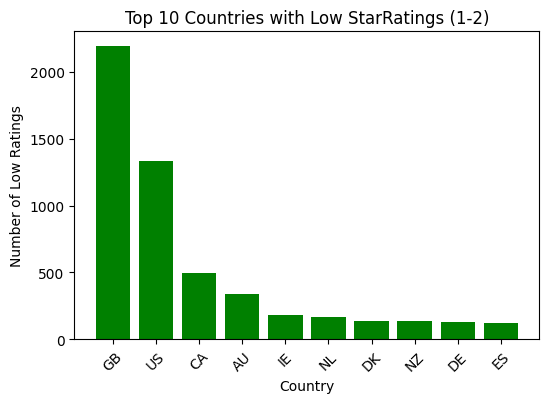

In [24]:
# Top 10 Countries with low StarRatings (1-2)

# Filter reviews with low StarRatings (1-2)
low_ratings = data[data['StarRatings'].between(1, 2)]

# Group by 'Country' and count the number of low ratings for each country
low_ratings_count = low_ratings.groupby('Country').size().reset_index(name='LowRatingsCount')

# Sort the results and get the top 10 countries with low ratings
top_10_low_ratings = low_ratings_count.sort_values(by='LowRatingsCount', ascending=False).head(10)

print("\nTop 10 countries with low StarRatings (1-2 StarRatings):")
print(top_10_low_ratings)

# Plot the top 10 countries with low StarRatings (1-2)
plt.figure(figsize=(6, 4))
plt.bar(top_10_low_ratings['Country'], top_10_low_ratings['LowRatingsCount'], color='green')
plt.xlabel('Country')
plt.ylabel('Number of Low Ratings')
plt.title('Top 10 Countries with Low StarRatings (1-2)')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Check Customers' reviews texts in the Review column
data[['StarRatings', 'Review']].values[:5]

array([[3,
        "Amazon is easy to work with, but they fulfill their orders via 3rd party companies and working with them is hit or miss. I ordered a Bread Proofer and received a Snow Cone Maker! I've spent over an hour chatting with them trying to resolve it and Amazon sent me to Cherry Surprise Store, who acknowledged my return request, but said they would forward it to Amazon! I'm not 100% sure what will happen next."],
       [5,
        "I have been using AliExpress for well over a year now and have been consistently impressed with their range and quality of their products, as well as of course their prices, in the vast majority of cases far, far, better on all fronts above than their big competitors in the UK. I also particularly like the number of places on their site where you can arrange for your own pictures/designs to be printed on shirts, bags, cases, flags, etc etc etc.\nBrilliant.\nSure, you have to wait longer to receive one's order from AliExpress, in practise 2 to 3

### DATA PREPROCESSING

In [27]:
# Convert the comments in the review column to lowercase.
# To standardizes the data into a uniform format, eliminating inconsistencies that might arise from differences in case 
#  sensitivity during the text processing phase.

data['Review'] = data['Review'].str.lower()

In [28]:
import re  # For regular expressions

# Remove special characters, numbers and space
data['Review'] = data['Review'].astype(str)
data['Review'] = data['Review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

In [29]:
import string
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

# Remove frequetly repeated words (Stopwords)
stop_words = set(stopwords.words('english'))
data['Review'] = data['Review'].apply(lambda x:" ".join(x for x in str(x).split() if x not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaoth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaoth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaoth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kaoth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
# Obtain root forms of words in Review column using Lemmetization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['Review'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [31]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kaoth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
from nltk.tokenize import word_tokenize

# Tokenization (Transform text in Review into a structured format)
data['Review'] = data['Review'].apply(lambda x: word_tokenize(x))

In [33]:
data['Review'][:5]

0    [amazon, easy, work, fulfill, order, via, rd, ...
1    [using, aliexpress, well, year, consistently, ...
2    [good, customercentric, marketplace, neverthel...
3    [purchased, android, tesla, style, radio, inst...
4    [absolute, con, job, dont, waste, money, scamm...
Name: Review, dtype: object

In [34]:
# Write a function for the Data Preprocessing
def clean_text(text):
    text = str(text)
    text = text.lower() # to convert words to lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text) # remove special characters and numbers
    text = re.sub(r"\st", " ", text).strip() # remove extra spaces
    tokens = word_tokenize(text) # tokenize text
    tokens = [word for word in tokens if word not in stop_words] # remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # lemmatize tokens
    return " ".join(tokens)

data['clean_review'] = data['Review'].apply(clean_text)

In [35]:
data['clean_review'][:5]

0    amazon easy work fulfill order via rd party co...
1    using aliexpress well year consistently impres...
2    good customercentric marketplace nevertheless ...
3    purchased android esla style radio installed s...
4    absolute con job dont waste money scammer rece...
Name: clean_review, dtype: object

##  SENTIMENT ANALYSIS (Using VADER Sentiment Analysis and TextBlob Sentiment Analysis Models)

In [37]:
#!pip install textblob


In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [39]:
# Download necessary NLTK data
nltk.download('vader_lexicon')
from tqdm.notebook import tqdm
from textblob import TextBlob

# Instantiate VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kaoth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [41]:
sia.polarity_scores('i dont like it')

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [42]:
# Run polarity score on Review with high StarRatings
sia.polarity_scores(data['clean_review'][1])

{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9689}

In [43]:
# Run polarity score on Review with low StarRatings
sia.polarity_scores(data['clean_review'][4])

{'neg': 0.073, 'neu': 0.792, 'pos': 0.135, 'compound': 0.2575}

In [44]:
data['ID'] = data.index.map(lambda x: f'{x:02}')
data = data[['ID'] + [col for col in data.columns if col != 'ID']]
data.head()

,ID,Reviewer,Country,StarRatings,Subject,Review,Date_posted,clean_review
0,00,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","[amazon, easy, work, fulfill, order, via, rd, ...",2024-06-04,amazon easy work fulfill order via rd party co...
1,01,Arthur Riding,GB,5,"Great range of products, generally superior qu...","[using, aliexpress, well, year, consistently, ...",2024-06-04,using aliexpress well year consistently impres...
2,02,UK shopper Val,GB,5,Good!,"[good, customercentric, marketplace, neverthel...",2024-06-03,good customercentric marketplace nevertheless ...
3,03,Jim Corkery,CA,1,I purchased an Android Tesla style…,"[purchased, android, tesla, style, radio, inst...",2024-06-02,purchased android esla style radio installed s...
4,04,chris bardin,IE,1,They are an absolute con job dont waste…,"[absolute, con, job, dont, waste, money, scamm...",2024-06-04,absolute con job dont waste money scammer rece...


In [45]:
# Run polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['clean_review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/11161 [00:00<?, ?it/s]

In [46]:
#res

In [47]:
# VADER Sentiment polarity score
vader_score = pd.DataFrame(res).T
vader_score.head()

,neg,neu,pos,compound
00,0.030,0.583,0.387,0.9432
01,0.000,0.694,0.306,0.9689
02,0.153,0.587,0.259,0.6705
03,0.000,0.909,0.091,0.5719
04,0.073,0.792,0.135,0.2575


In [48]:
# Merge VADER sentiment polarity score with original dataframe
vader_score = vader_score.reset_index().rename(columns={'index': 'ID'})
data = data.merge(vader_score, how='left')
data.head()

,ID,Reviewer,Country,StarRatings,Subject,Review,Date_posted,clean_review,neg,neu,pos,compound
0,00,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","[amazon, easy, work, fulfill, order, via, rd, ...",2024-06-04,amazon easy work fulfill order via rd party co...,0.030,0.583,0.387,0.9432
1,01,Arthur Riding,GB,5,"Great range of products, generally superior qu...","[using, aliexpress, well, year, consistently, ...",2024-06-04,using aliexpress well year consistently impres...,0.000,0.694,0.306,0.9689
2,02,UK shopper Val,GB,5,Good!,"[good, customercentric, marketplace, neverthel...",2024-06-03,good customercentric marketplace nevertheless ...,0.153,0.587,0.259,0.6705
3,03,Jim Corkery,CA,1,I purchased an Android Tesla style…,"[purchased, android, tesla, style, radio, inst...",2024-06-02,purchased android esla style radio installed s...,0.000,0.909,0.091,0.5719
4,04,chris bardin,IE,1,They are an absolute con job dont waste…,"[absolute, con, job, dont, waste, money, scamm...",2024-06-04,absolute con job dont waste money scammer rece...,0.073,0.792,0.135,0.2575


   StarRatings  Vader_Compound_Score
0            1             -0.240234
1            2             -0.075333
2            3              0.101276
3            4              0.372645
4            5              0.565206


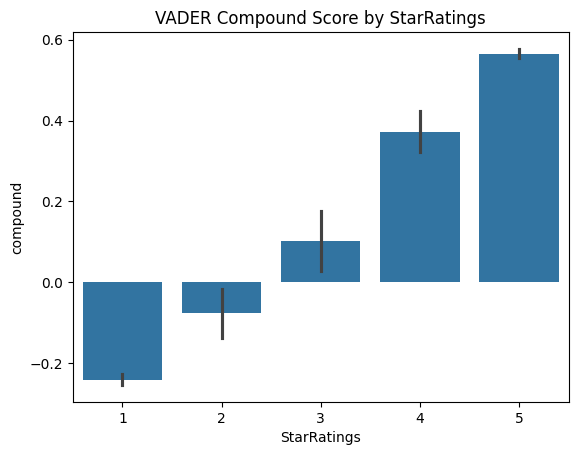

In [49]:
# Plot VADER Compound score and StarRatings

# Create a DataFrame to hold the average VADER compound score for each star rating
vader_compound_avg = data.groupby('StarRatings')['compound'].mean().reset_index()

# Rename the columns for clarity
vader_compound_avg.columns = ['StarRatings', 'Vader_Compound_Score']

# Display the DataFrame
print(vader_compound_avg)
ax = sns.barplot(data=data, x='StarRatings', y='compound')
ax.set_title('VADER Compound Score by StarRatings')
plt.show()

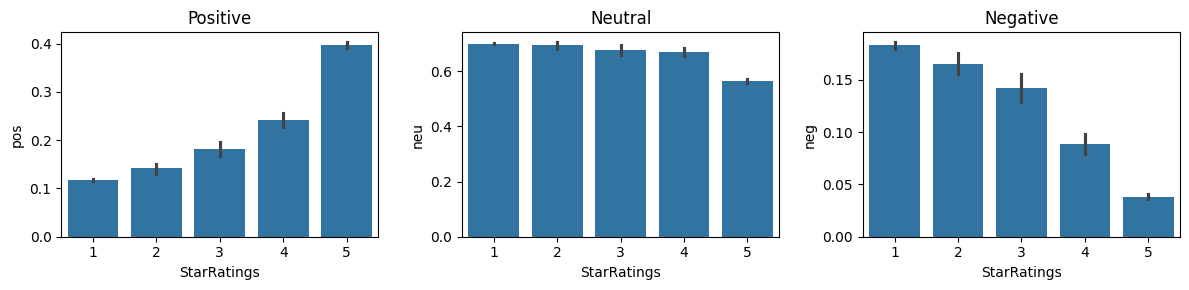

In [50]:
# Plot VADER Positive, Neutral and Negative scores and StarRatings
fig, axs = plt.subplots(1,3, figsize=(12,3))
sns.barplot(data=data, x='StarRatings', y='pos', ax=axs[0])
sns.barplot(data=data, x='StarRatings', y='neu', ax=axs[1])
sns.barplot(data=data, x='StarRatings', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [51]:
# Apply VADER sentiment analysis
data['vader_sentiment'] = data['clean_review'].apply(
    lambda x: 'positive' if sia.polarity_scores(x)['compound'] >= 0.10 else (
        'negative' if sia.polarity_scores(x)['compound'] <= -0.10 else 'neutral'))

# Filter out each sentiment from VADER sentiment analysis
positive_reviews = data[data['vader_sentiment'] == 'positive']['clean_review']
negative_reviews = data[data['vader_sentiment'] == 'negative']['clean_review']
neutral_reviews = data[data['vader_sentiment'] == 'neutral']['clean_review']

from collections import Counter

# Function to get the most common words
def get_most_common_words(reviews, n=50):
    all_words = ' '.join(reviews).split()
    return [word for word, count in Counter(all_words).most_common(n)]

# Get the top 50 most common words in positive, negative, and neutral reviews
positive_keywords = get_most_common_words(positive_reviews, 50)
negative_keywords = get_most_common_words(negative_reviews, 50)
neutral_keywords = get_most_common_words(neutral_reviews, 50)

print('Positive Keywords:', positive_keywords)
print('Negative Keywords:', negative_keywords)
print('Neutral Keywords:', neutral_keywords)



Positive Keywords: ['aliexpress', 'good', 'seller', 'item', 'product', 'order', 'ime', 'refund', 'get', 'service', 'customer', 'delivery', 'money', 'never', 'price', 'quality', 'dont', 'received', 'shipping', 'day', 'buy', 'great', 'one', 'ordered', 'return', 'amazon', 'even', 'like', 'back', 'company', 'would', 'fast', 'store', 'dispute', 'well', 'site', 'month', 'delivered', 'always', 'help', 'arrived', 'experience', 'racking', 'use', 'sent', 'review', 'problem', 'ive', 'package', 'hing']
Negative Keywords: ['aliexpress', 'item', 'seller', 'refund', 'order', 'money', 'customer', 'dispute', 'get', 'never', 'service', 'ime', 'product', 'dont', 'back', 'received', 'ordered', 'return', 'company', 'even', 'one', 'buy', 'day', 'sent', 'would', 'delivered', 'delivery', 'package', 'month', 'good', 'scam', 'racking', 'send', 'shipping', 'amazon', 'store', 'wrong', 'didnt', 'site', 'still', 'got', 'said', 'problem', 'use', 'bad', 'bought', 'give', 'buyer', 'pay', 'contact']
Neutral Keywords: [

In [52]:
# Apply TextBlob sentiment analysis
data['textblob_sentiment'] = data['clean_review'].apply(
    lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else (
        'negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral'))

# Filter out each sentiment from TextBlob sentiment analysis
positive_reviews = data[data['textblob_sentiment'] == 'positive']['clean_review']
negative_reviews = data[data['textblob_sentiment'] == 'negative']['clean_review']
neutral_reviews = data[data['textblob_sentiment'] == 'neutral']['clean_review']

# Function to get the most common words
def get_most_common_words(reviews, n=50):
    all_words = ' '.join(reviews).split()
    return [word for word, count in Counter(all_words).most_common(n)]

# Get the top 50 most common words in positive, negative, and neutral reviews
positive_keywords = get_most_common_words(positive_reviews, 50)
negative_keywords = get_most_common_words(negative_reviews, 50)
neutral_keywords = get_most_common_words(neutral_reviews, 50)

print('Positive Keywords:', positive_keywords)
print('Negative Keywords:', negative_keywords)
print('Neutral Keywords:', neutral_keywords)



Positive Keywords: ['aliexpress', 'seller', 'item', 'good', 'order', 'product', 'refund', 'ime', 'get', 'customer', 'service', 'money', 'delivery', 'never', 'dispute', 'received', 'dont', 'shipping', 'day', 'price', 'one', 'buy', 'quality', 'return', 'ordered', 'back', 'even', 'would', 'great', 'company', 'amazon', 'store', 'like', 'fast', 'delivered', 'many', 'sent', 'problem', 'month', 'site', 'package', 'racking', 'also', 'arrived', 'use', 'bought', 'hing', 'review', 'year', 'got']
Negative Keywords: ['aliexpress', 'item', 'seller', 'refund', 'order', 'customer', 'money', 'service', 'get', 'never', 'ime', 'product', 'dispute', 'dont', 'back', 'received', 'ordered', 'return', 'company', 'even', 'one', 'buy', 'day', 'sent', 'would', 'delivery', 'amazon', 'delivered', 'racking', 'month', 'wrong', 'package', 'send', 'bad', 'site', 'still', 'shipping', 'store', 'like', 'said', 'got', 'contact', 'didnt', 'give', 'number', 'fake', 'use', 'help', 'say', 'arrived']
Neutral Keywords: ['aliexp

In [53]:
# Define the sentiment function for 'StarRatings'
def star_rating_sentiment(StarRatings):
    if StarRatings == 4 or StarRatings == 5:
        return 'positive'
    elif StarRatings == 1 or StarRatings == 2:
        return 'negative'
    else:
        return 'neutral'

data['StarRatings_sentiment'] = data['StarRatings'].apply(star_rating_sentiment)

In [54]:
data.head()

,ID,Reviewer,Country,StarRatings,Subject,Review,Date_posted,clean_review,neg,neu,pos,compound,vader_sentiment,textblob_sentiment,StarRatings_sentiment
0,00,Mike Santarcangelo,US,3,"Amazon may be a fine company, but...","[amazon, easy, work, fulfill, order, via, rd, ...",2024-06-04,amazon easy work fulfill order via rd party co...,0.030,0.583,0.387,0.9432,positive,positive,neutral
1,01,Arthur Riding,GB,5,"Great range of products, generally superior qu...","[using, aliexpress, well, year, consistently, ...",2024-06-04,using aliexpress well year consistently impres...,0.000,0.694,0.306,0.9689,positive,positive,positive
2,02,UK shopper Val,GB,5,Good!,"[good, customercentric, marketplace, neverthel...",2024-06-03,good customercentric marketplace nevertheless ...,0.153,0.587,0.259,0.6705,positive,positive,positive
3,03,Jim Corkery,CA,1,I purchased an Android Tesla style…,"[purchased, android, tesla, style, radio, inst...",2024-06-02,purchased android esla style radio installed s...,0.000,0.909,0.091,0.5719,positive,positive,negative
4,04,chris bardin,IE,1,They are an absolute con job dont waste…,"[absolute, con, job, dont, waste, money, scamm...",2024-06-04,absolute con job dont waste money scammer rece...,0.073,0.792,0.135,0.2575,positive,neutral,negative


StarRatings_sentiment
negative    6763
positive    4126
neutral      272
Name: count, dtype: int64


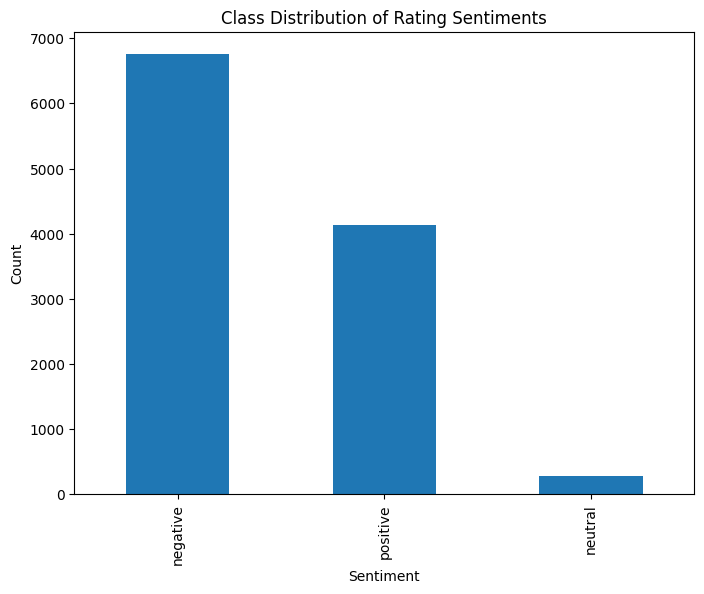

In [55]:

# Check class distribution in the dataset
class_distribution = data['StarRatings_sentiment'].value_counts()
print(class_distribution)

# Visualize class distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Distribution of Rating Sentiments')
plt.show()


In [56]:
# Evaluate vader Model (Compare Vader Sentiment with starratings Sentiment)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Extract true labels and predictions
y_true = data['StarRatings_sentiment']
y_pred = data['vader_sentiment']

# Check unique labels
print("Unique labels in y_true:", y_true.unique())
print("Unique labels in y_pred:", y_pred.unique())

# Get unique labels from y_true and y_pred
unique_labels = sorted(set(y_true) | set(y_pred))

# Compute metrics
vader_confusion = confusion_matrix(y_true, y_pred, labels=unique_labels)
vader_accuracy = accuracy_score(y_true, y_pred)
vader_f1 = f1_score(y_true, y_pred, average='weighted')
vader_precision = precision_score(y_true, y_pred, average='weighted')
vader_recall = recall_score(y_true, y_pred, average='weighted')

# Print the results
print('VADER Confusion Matrix:')
print(vader_confusion)
print('\nVADER Accuracy Score:', vader_accuracy)
print('VADER F1 Score:', vader_f1)
print('VADER Precision Score:', vader_precision)
print('VADER Recall Score:', vader_recall)

Unique labels in y_true: ['neutral' 'positive' 'negative']
Unique labels in y_pred: ['positive' 'negative' 'neutral']
VADER Confusion Matrix:
[[4172  652 1939]
 [ 106   32  134]
 [ 256  393 3477]]

VADER Accuracy Score: 0.6881999820804587
VADER F1 Score: 0.7143959856213679
VADER Precision Score: 0.7898932817208077
VADER Recall Score: 0.6881999820804587


In [57]:
# Evaluate TextBlob Model (Compare Textblob Sentiment with Starratings sentiment)
y_true = data['StarRatings_sentiment']
y_pred = data['textblob_sentiment']

# Check unique labels
print("Unique labels in y_true:", y_true.unique())
print("Unique labels in y_pred:", y_pred.unique())

# Get unique labels from y_true and y_pred
unique_labels = sorted(set(y_true) | set(y_pred))
textblob_confusion = confusion_matrix(y_true, y_pred, labels=unique_labels)
textblob_accuracy = accuracy_score(y_true, y_pred)
textblob_f1 = f1_score(y_true, y_pred, average='weighted')
textblob_precision = precision_score(y_true, y_pred, average='weighted')
textblob_recall = recall_score(y_true, y_pred, average='weighted')

# Print the results
print('Textblob Confusion Matrix:')
print(textblob_confusion)
print('\nTextblob Accuracy Score:', textblob_accuracy)
print('Textblob F1 Score:', textblob_f1)
print('Textblob Precision Score:', textblob_precision)
print('Textblob Recall Score:', textblob_recall)

Unique labels in y_true: ['neutral' 'positive' 'negative']
Unique labels in y_pred: ['positive' 'neutral' 'negative']
Textblob Confusion Matrix:
[[3284  792 2687]
 [  82   16  174]
 [ 209  266 3651]]

Textblob Accuracy Score: 0.622793656482394
Textblob F1 Score: 0.6393058301114187
Textblob Precision Score: 0.7642527736013859
Textblob Recall Score: 0.622793656482394


## SENTIMENTS VISUALIZATION

vader_sentiment
positive    5550
negative    4534
neutral     1077
Name: count, dtype: int64


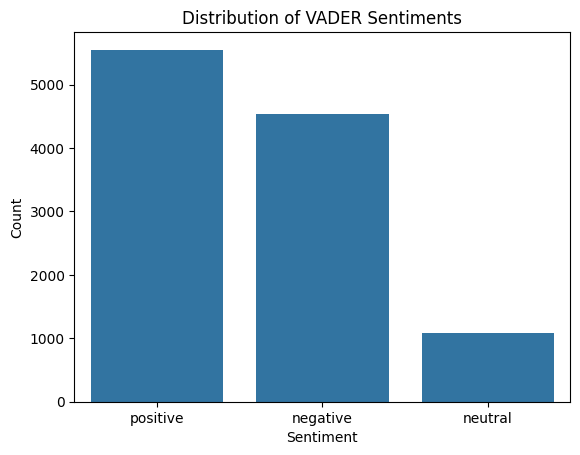

In [59]:
# Review Sentiment Distribution (StarRatings)
vader_sentiment_count = data['vader_sentiment'].value_counts()
print(vader_sentiment_count)

# Plot the distribution of sentiments
sns.countplot(x='vader_sentiment', data=data)
plt.title('Distribution of VADER Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

vader_sentiment
positive    49.73
negative    40.62
neutral      9.65
Name: count, dtype: float64


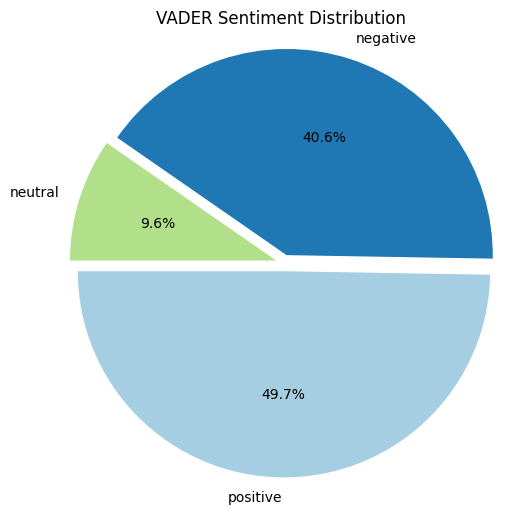

In [60]:
# Percentage Distribution of VADER Sentiment
vader_sentiment = round(data['vader_sentiment'].value_counts()/data.shape[0]*100,2)
print(vader_sentiment)

# Plot pie chart for the star ratings distribution
explode = [0.04] * len(vader_sentiment)
plt.figure(figsize=(6, 6))
plt.pie(vader_sentiment, labels=vader_sentiment.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors, 
        explode=explode)
plt.title('VADER Sentiment Distribution')
plt.axis('equal')
plt.show()

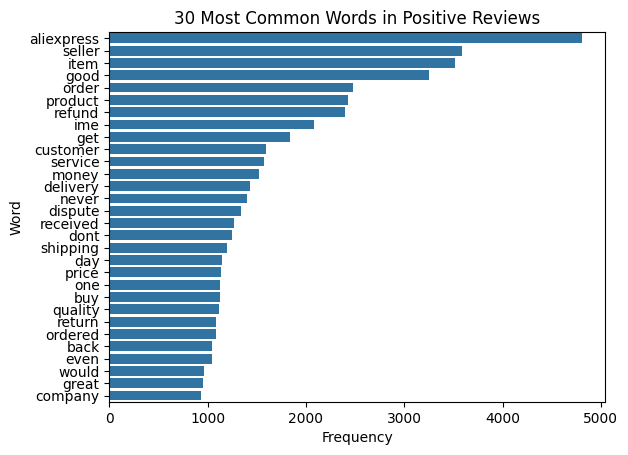

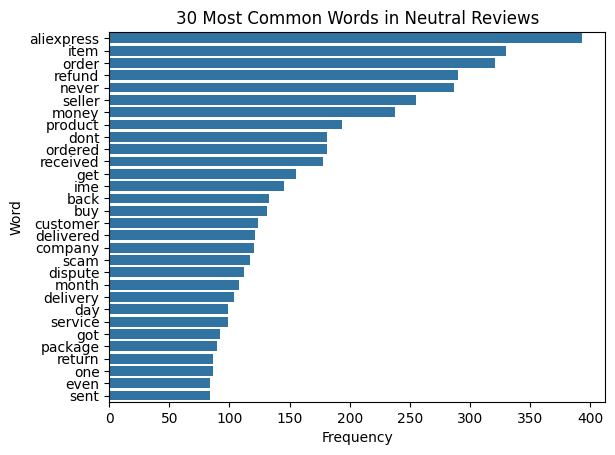

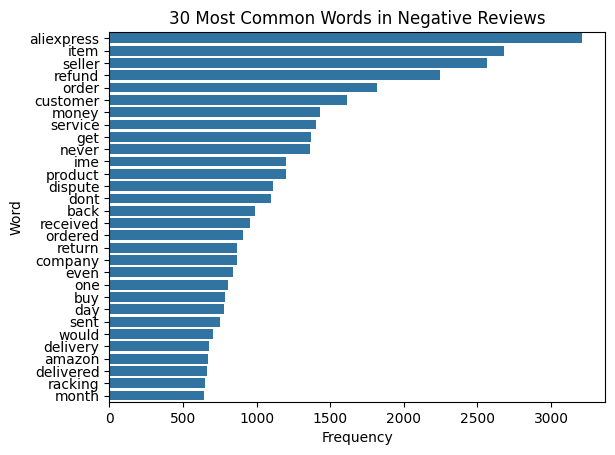

In [61]:
# Count most common words used in sentiments

# Get the most common words in positive reviews
positive_words = ' '.join(positive_reviews).split()
positive_word_freq = Counter(positive_words).most_common(30)

# Get the most common words in neutral reviews
neutral_words = ' '.join(neutral_reviews).split()
neutral_word_freq = Counter(neutral_words).most_common(30)

# Get the most common words in negative reviews
negative_words = ' '.join(negative_reviews).split()
negative_word_freq = Counter(negative_words).most_common(30)

# Plot the most common words in positive reviews
positive_df = pd.DataFrame(positive_word_freq, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=positive_df)
plt.title('30 Most Common Words in Positive Reviews')
plt.show()

# Plot the most common words in neutral reviews
neutral_df = pd.DataFrame(neutral_word_freq, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=neutral_df)
plt.title('30 Most Common Words in Neutral Reviews')
plt.show()

# Plot the most common words in negative reviews
negative_df = pd.DataFrame(negative_word_freq, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=negative_df)
plt.title('30 Most Common Words in Negative Reviews')
plt.show()

StarRatings_sentiment
negative    6763
positive    4126
neutral      272
Name: count, dtype: int64


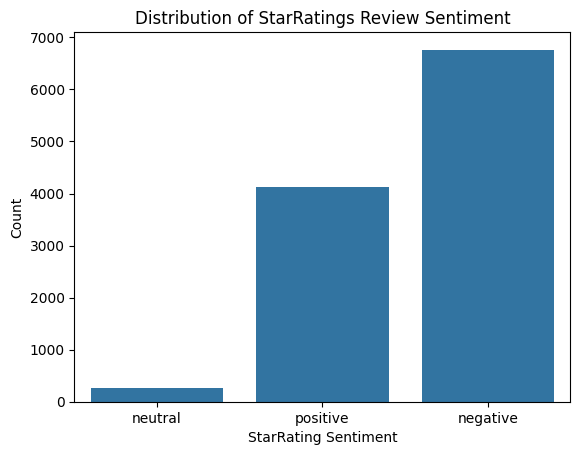

In [62]:
# Review Sentiment Distribution (StarRatings)
sentiment_count = data['StarRatings_sentiment'].value_counts()
print(sentiment_count)

# Plot the distribution of sentiments
sns.countplot(x='StarRatings_sentiment', data=data)
plt.title('Distribution of StarRatings Review Sentiment')
plt.xlabel('StarRating Sentiment')
plt.ylabel('Count')
plt.show()

Top 10 countries with Positive sentiment (VADER):
Country
GB    1019
US     845
CA     341
AU     272
NL     188
BR     171
FR     170
ES     154
NZ     148
IL     139
Name: count, dtype: int64


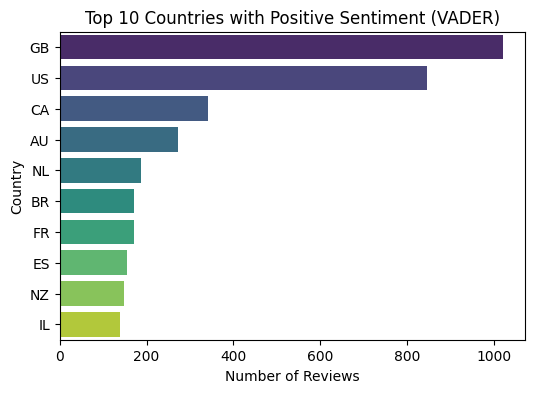

Top 10 countries with Positive sentiment (Review):
Country
US    501
GB    442
CA    224
AU    207
BR    181
NL    171
ES    161
FR    151
IL    141
NZ    127
Name: count, dtype: int64


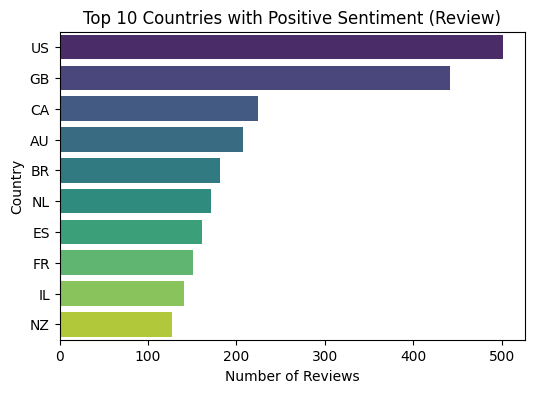

In [63]:
# Function to get top N countries by sentiment
def get_top_countries_by_sentiment(data, sentiment_column, sentiment_value, top_n=10):
    # Filter data by sentiment value
    sentiment_data = data[data[sentiment_column] == sentiment_value]
    
    # Count occurrences of each country
    country_counts = sentiment_data['Country'].value_counts().head(top_n)
    
    return country_counts

# Top 10 countries with Positive sentiment in 'vader_sentiment'

top_positive_countries_vader = get_top_countries_by_sentiment(data, 'vader_sentiment', 'positive')
print("Top 10 countries with Positive sentiment (VADER):")
print(top_positive_countries_vader)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_positive_countries_vader.values, y=top_positive_countries_vader.index, palette='viridis')
plt.title('Top 10 Countries with Positive Sentiment (VADER)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

# Top 10 countries with Positive sentiment in 'StarRatings_sentiment'

top_positive_countries_review = get_top_countries_by_sentiment(data, 'StarRatings_sentiment', 'positive')
print("Top 10 countries with Positive sentiment (Review):")
print(top_positive_countries_review)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_positive_countries_review.values, y=top_positive_countries_review.index, palette='viridis')
plt.title('Top 10 Countries with Positive Sentiment (Review)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()


Top 10 countries with Neutral sentiment (VADER):
Country
GB    244
US    209
CA     57
AU     47
NL     36
ES     33
DE     29
NZ     27
IT     26
IE     25
Name: count, dtype: int64


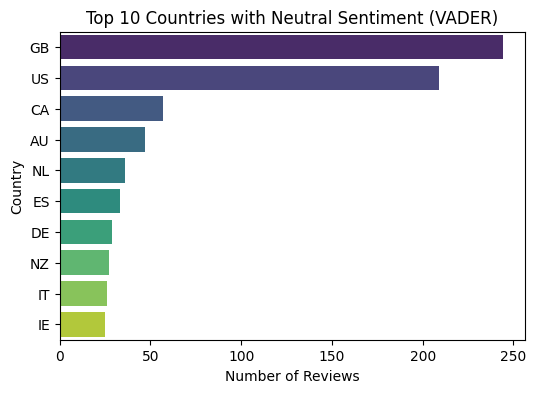


Top 10 countries with Neutral sentiment (Review):
Country
GB    56
US    49
CA    15
AU    11
FR     8
NZ     8
DE     7
IT     7
ES     6
NL     6
Name: count, dtype: int64


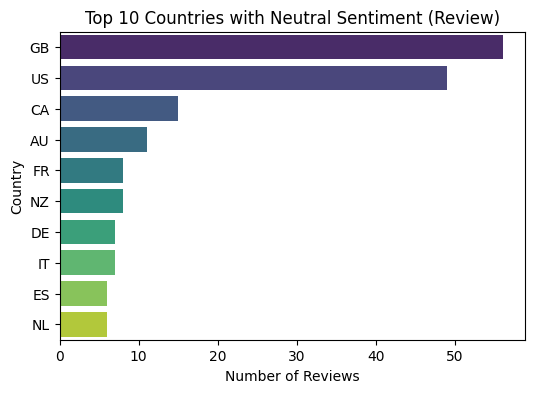

In [64]:
# Top 10 countries with Neutral sentiment in 'vader_sentiment'

top_neutral_countries_vader = get_top_countries_by_sentiment(data, 'vader_sentiment', 'neutral')
print("\nTop 10 countries with Neutral sentiment (VADER):")
print(top_neutral_countries_vader)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_neutral_countries_vader.values, y=top_neutral_countries_vader.index, palette='viridis')
plt.title('Top 10 Countries with Neutral Sentiment (VADER)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

# Top 10 countries with Neutral sentiment in 'review_sentiment'

top_neutral_countries_review = get_top_countries_by_sentiment(data, 'StarRatings_sentiment', 'neutral')
print("\nTop 10 countries with Neutral sentiment (Review):")
print(top_neutral_countries_review)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_neutral_countries_review.values, y=top_neutral_countries_review.index, palette='viridis')
plt.title('Top 10 Countries with Neutral Sentiment (Review)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()


Top 10 countries with Negative sentiment (VADER):
Country
GB    1426
US     828
CA     334
AU     237
NL     118
IE     111
ES     106
DK     101
NZ      96
FR      90
Name: count, dtype: int64


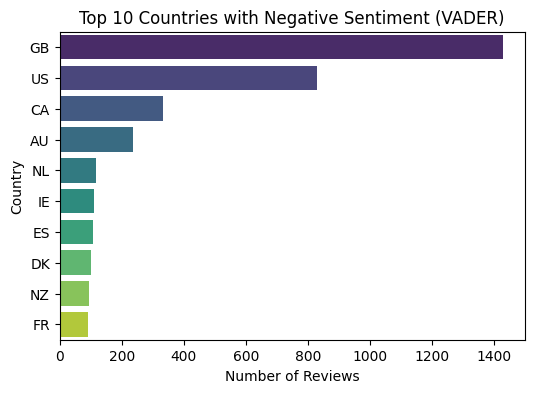


Top 10 countries with Negative sentiment (Review):
Country
GB    2191
US    1332
CA     493
AU     338
IE     179
NL     165
DK     137
NZ     136
DE     131
ES     126
Name: count, dtype: int64


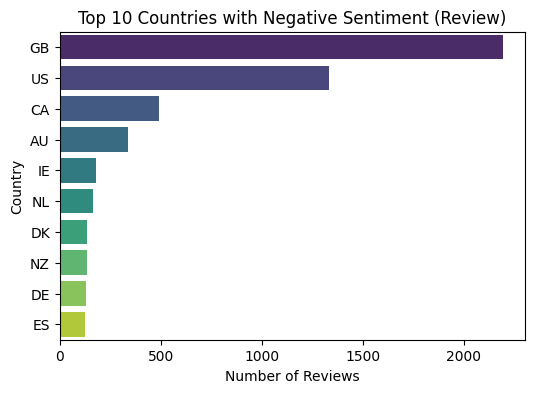

In [65]:
# Top 10 countries with Negative sentiment in 'vader_sentiment'

top_negative_countries_vader = get_top_countries_by_sentiment(data, 'vader_sentiment', 'negative')
print("\nTop 10 countries with Negative sentiment (VADER):")
print(top_negative_countries_vader)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_negative_countries_vader.values, y=top_negative_countries_vader.index, palette='viridis')
plt.title('Top 10 Countries with Negative Sentiment (VADER)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

# Top 10 countries with Negative sentiment in 'review_sentiment'

top_negative_countries_review = get_top_countries_by_sentiment(data, 'StarRatings_sentiment', 'negative')
print("\nTop 10 countries with Negative sentiment (Review):")
print(top_negative_countries_review)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_negative_countries_review.values, y=top_negative_countries_review.index, palette='viridis')
plt.title('Top 10 Countries with Negative Sentiment (Review)')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

In [66]:
# Count words frquency in the dataset
wf = data["clean_review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
wf.columns = ['words', 'wf']
wf_sorted = wf.sort_values(by='wf', ascending=False)
wf_sorted

,words,wf
39,aliexpress,8406.0
260,item,6535.0
94,seller,6413.0
165,refund,4935.0
24,order,4615.0
...,...,...
10997,reois,1.0
11000,ntait,1.0
11001,dernire,1.0
11002,dcid,1.0


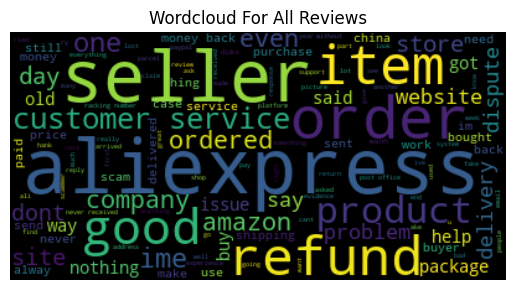

In [67]:
# Create and visualize a Word Cloud- To display the frequently occurring words in the dataset in a visual format
from wordcloud import WordCloud

text = " ".join(i for i in data.clean_review)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud For All Reviews')
plt.axis("off")
plt.show()

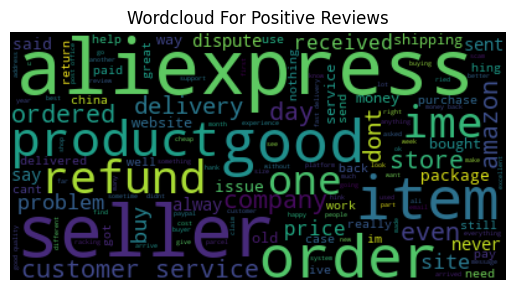

In [68]:
# Display the frequently occurring words in the positive reviews
positive_reviews_text = ' '.join(positive_reviews)

wordcloud = WordCloud().generate(positive_reviews_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud For Positive Reviews')
plt.axis("off")
plt.show()

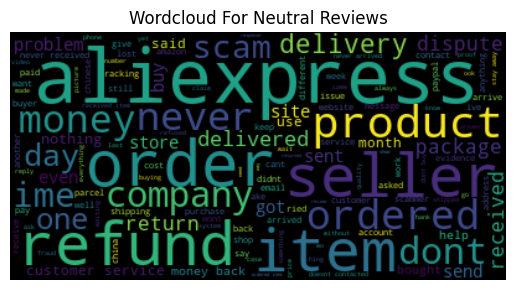

In [69]:
# Display the frequently occurring words in the negative reviews
neutral_reviews_text = ' '.join(neutral_reviews)

wordcloud = WordCloud().generate(neutral_reviews_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud For Neutral Reviews')
plt.axis("off")
plt.show()

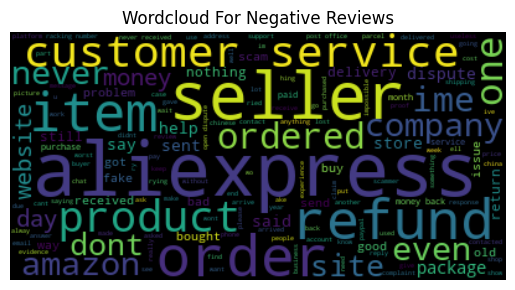

In [70]:
# Display the frequently occurring words in the negative reviews
negative_reviews_text = ' '.join(negative_reviews)

wordcloud = WordCloud().generate(negative_reviews_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Wordcloud For Negative Reviews')
plt.axis("off")
plt.show()

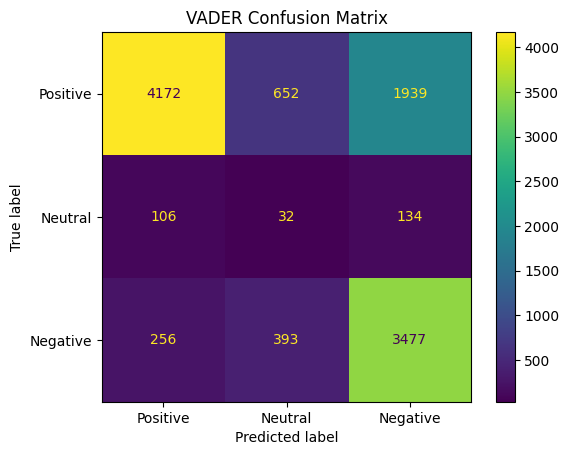

In [71]:
# Plot VADER confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=vader_confusion, display_labels=['Positive', 'Neutral', 'Negative']).plot()
plt.title('VADER Confusion Matrix')
plt.show()

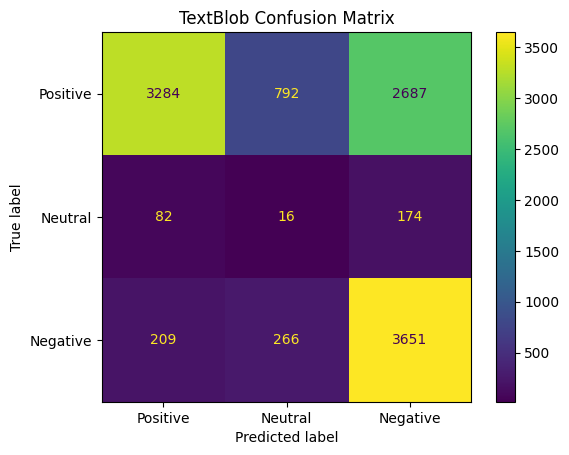

In [72]:
# Plot TextBlob confusion matrix
ConfusionMatrixDisplay(confusion_matrix=textblob_confusion, display_labels=['Positive', 'Neutral', 'Negative']).plot()
plt.title('TextBlob Confusion Matrix')
plt.show()

Correlation matrix:
                         StarRatings  vader_sentiment_numeric
StarRatings                 1.000000                 0.566169
vader_sentiment_numeric     0.566169                 1.000000


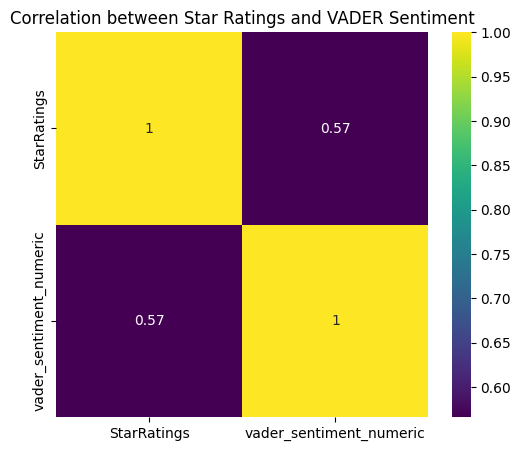

In [73]:
# Check for correlation between StarRatings and VADER Sentiment

# Convert 'vader_sentiment' to numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['vader_sentiment_numeric'] = data['vader_sentiment'].map(sentiment_mapping)

# Check for correlation
correlation = data[['StarRatings', 'vader_sentiment_numeric']].corr()

print("Correlation matrix:")
print(correlation)

# Plotting the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation between Star Ratings and VADER Sentiment')
plt.show()

Correlation matrix:
                            StarRatings  textblob_sentiment_numeric
StarRatings                     1.00000                     0.48755
textblob_sentiment_numeric      0.48755                     1.00000


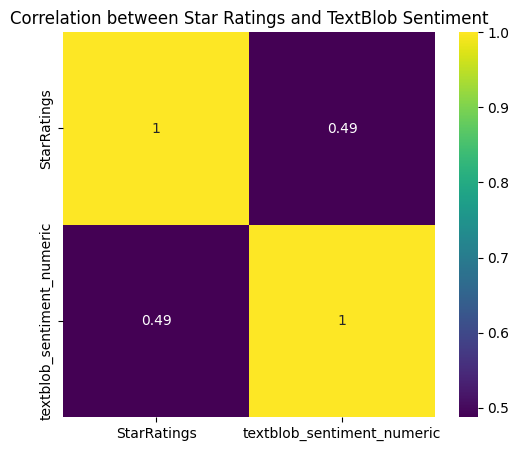

In [74]:
# Check for correlation between StarRatings and TextBlob Sentiment

# Convert 'vader_sentiment' to numerical values
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
data['textblob_sentiment_numeric'] = data['textblob_sentiment'].map(sentiment_mapping)

# Check for correlation
correlation = data[['StarRatings', 'textblob_sentiment_numeric']].corr()

print("Correlation matrix:")
print(correlation)

# Plotting the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation between Star Ratings and TextBlob Sentiment')
plt.show()

## Feature Engineering

In [76]:
# Create Bag of Words using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Create DTM (Document-term matrix)
dtm = cv.fit_transform(data['clean_review'])

# Convert the DTM to DataFrame
dtm_data = pd.DataFrame(dtm.toarray(), columns = cv.get_feature_names_out())

dtm_data.head()

,aa,aaa,aaaaa,aaaaaaa,aaliexpress,aalst,aan,aanbod,aangeboden,aankomst,...,zurckgesendet,zurcksenden,zwischen,zwnav,zwnavaotsr,zwo,zwok,zwykle,zysecurity,zysecury
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF

#Instantiate TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(data['clean_review']).toarray()

# Extract target variable
y = data['vader_sentiment']

# Check the shape and type
print("Shape of x:", x.shape)
print("Type of x:", type(x))
print("Shape of y:", y.shape)
print("Type of y:", type(y))

# Print the first few rows of x and y
print("First few rows of x:")
print(x[:5])
print("First few rows of y:")
print(y[:5])

# Print the feature names
print("Feature names:")
print(vectorizer.get_feature_names_out())

Shape of x: (11161, 19752)
Type of x: <class 'numpy.ndarray'>
Shape of y: (11161,)
Type of y: <class 'pandas.core.series.Series'>
First few rows of x:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First few rows of y:
0    positive
1    positive
2    positive
3    positive
4    positive
Name: vader_sentiment, dtype: object
Feature names:
['aa' 'aaa' 'aaaaa' ... 'zwykle' 'zysecurity' 'zysecury']


### MODELS DEVELOPMENT- NAIVE BAYES/LOGISTIC REGRESSION/RANDOM FOREST MODELS

In [80]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"x train: {x_train.shape}")
print(f"x test: {x_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

x train: (7812, 19752)
x test: (3349, 19752)
y train: (7812,)
y test: (3349,)


In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
# Assuming x_train and y_train are your features and labels
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [84]:
# Train Naive Bayes model

nb_model = MultinomialNB()
nb_model.fit(x_resampled, y_resampled)

MultinomialNB()

In [85]:
# Predict on the test set
nb_pred = nb_model.predict(x_test)

In [86]:
nb_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'negative',
       'negative'], dtype='<U8')

In [87]:
# Compute metrics and confusion matrix
accuracy = accuracy_score(y_test, nb_pred)
f1 = f1_score(y_test, nb_pred, average = 'weighted', zero_division = 0)
precision = precision_score(y_test, nb_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, nb_pred, average='weighted', zero_division=0)
nb_confusion = confusion_matrix(y_test, nb_pred)

# Create DataFrame to store all metrics for the NB model
naive_baiyes_model = pd.DataFrame(nb_confusion, index=['True Negative', 'True Neutral', 'True Positive'], columns=['Pred Negative', 'Pred Neutral', 'Pred Positive'])
naive_baiyes_model.loc['Accuracy'] = ['-', '-', accuracy]
naive_baiyes_model.loc['F1 Score'] = ['-', '-', f1]
naive_baiyes_model.loc['Precision'] = ['-', '-', precision]
naive_baiyes_model.loc['Recall'] = ['-', '-', recall]

print("Naive Baye Model Results:")
print(naive_baiyes_model)

Naive Baye Model Results:
              Pred Negative Pred Neutral  Pred Positive
True Negative          1256           24      73.000000
True Neutral            219           50      80.000000
True Positive           541           34    1072.000000
Accuracy                  -            -       0.710063
F1 Score                  -            -       0.691164
Precision                 -            -       0.730310
Recall                    -            -       0.710063


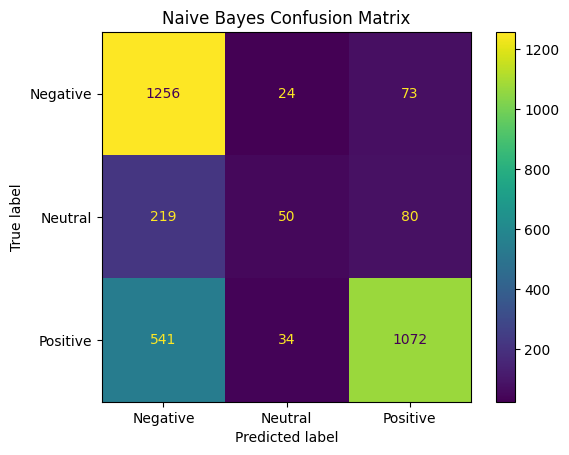

In [88]:
# Naive Bayes Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=nb_confusion, display_labels=['Negative', 'Neutral', 'Positive']).plot()
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [89]:
# Train Logistic Regression Model 

lg_model = LogisticRegression()
lg_model.fit(x_resampled, y_resampled)

LogisticRegression()

In [90]:
# Predict on the test set
lg_pred = lg_model.predict(x_test)

In [91]:
lg_pred

array(['negative', 'negative', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [92]:
# Compute metrics and confusion matrix
accuracy = accuracy_score(y_test, lg_pred)
f1 = f1_score(y_test, lg_pred, average = 'weighted', zero_division = 0)
precision = precision_score(y_test, lg_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, lg_pred, average='weighted', zero_division=0)
lg_confusion = confusion_matrix(y_test, lg_pred)

# Create DataFrame to store all metrics for the LR model
logistic_regression_model = pd.DataFrame(lg_confusion, index=['True Negative', 'True Neutral', 'True Positive'], columns=['Pred Negative', 'Pred Neutral', 'Pred Positive'])
logistic_regression_model.loc['Accuracy'] = ['-', '-', accuracy]
logistic_regression_model.loc['F1 Score'] = ['-', '-', f1]
logistic_regression_model.loc['Precision'] = ['-', '-', precision]
logistic_regression_model.loc['Recall'] = ['-', '-', recall]

print("Logistic Regression Model Results:")
print(logistic_regression_model)

Logistic Regression Model Results:
              Pred Negative Pred Neutral  Pred Positive
True Negative          1062          184     107.000000
True Neutral            125          175      49.000000
True Positive           262          150    1235.000000
Accuracy                  -            -       0.738131
F1 Score                  -            -       0.748596
Precision                 -            -       0.768564
Recall                    -            -       0.738131


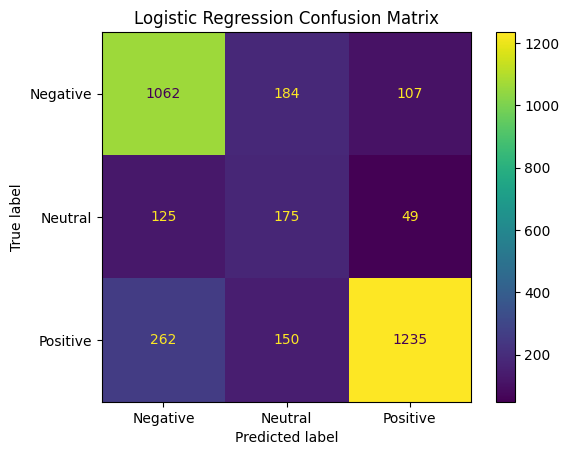

In [93]:
# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=lg_confusion, display_labels=['Negative', 'Neutral', 'Positive']).plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [94]:
# Train Random Forest Model

rf_model = RandomForestClassifier()
rf_model.fit(x_resampled, y_resampled)

RandomForestClassifier()

In [95]:
# Predict on the test set
rf_pred = rf_model.predict(x_test)

In [96]:
rf_pred

array(['negative', 'positive', 'positive', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [97]:
# Compute metrics and confusion matrix
accuracy = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred, average = 'weighted', zero_division = 0)
precision = precision_score(y_test, rf_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, rf_pred, average='weighted', zero_division=0)
rf_confusion = confusion_matrix(y_test, rf_pred)

# Create DataFrame to store all metrics for the RF model
random_forest_model = pd.DataFrame(rf_confusion, index=['True Negative', 'True Neutral', 'True Positive'], columns=['Pred Negative', 'Pred Neutral', 'Pred Positive'])
random_forest_model.loc['Accuracy'] = ['-', '-', accuracy]
random_forest_model.loc['F1 Score'] = ['-', '-', f1]
random_forest_model.loc['Precision'] = ['-', '-', precision]
random_forest_model.loc['Recall'] = ['-', '-', recall]

print("Random Forest Model Results:")
print(random_forest_model)

Random Forest Model Results:
              Pred Negative Pred Neutral  Pred Positive
True Negative          1173           73     107.000000
True Neutral            158          112      79.000000
True Positive           485           75    1087.000000
Accuracy                  -            -       0.708271
F1 Score                  -            -       0.703558
Precision                 -            -       0.725778
Recall                    -            -       0.708271


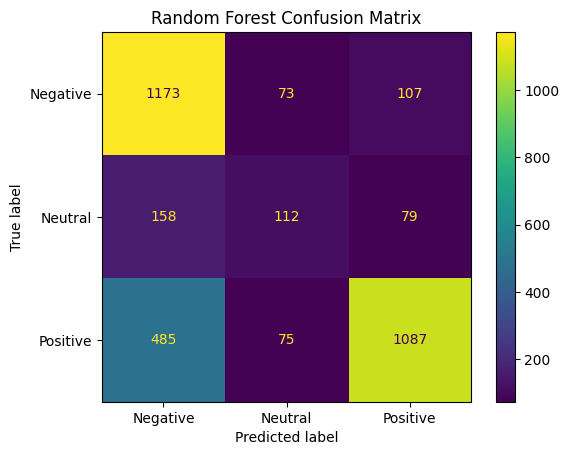

In [98]:
# Random Forest Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=rf_confusion, display_labels=['Negative', 'Neutral', 'Positive']).plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

In [99]:
# Train SVC Model
#svc_model = SVC()
#svc_model.fit(x_train, y_train)

In [100]:
# Predict on the test set
#svc_pred = svc_model.predict(x_test)

In [101]:
#svc_pred

In [102]:
# Compute metrics and confusion matrix
#accuracy = accuracy_score(y_test, svc_pred)
#f1 = f1_score(y_test, svc_pred, average = 'weighted', zero_division = 0)
#precision = precision_score(y_test, svc_pred, average='weighted', zero_division=0)
#recall = recall_score(y_test, svc_pred, average='weighted', zero_division=0)
#svc_confusion = confusion_matrix(y_test, svc_pred)

# Create DataFrame to store all metrics for the SVC model
#support_vector_model = pd.DataFrame(svc_confusion, index=['True Negative', 'True Neutral', 'True Positive'], columns=['Pred Negative', 'Pred Neutral', 'Pred Positive'])
#support_vector_model.loc['Accuracy'] = ['-', '-', accuracy]
#support_vector_model.loc['F1 Score'] = ['-', '-', f1]
#support_vector_model.loc['Precision'] = ['-', '-', precision]
#support_vector_model.loc['Recall'] = ['-', '-', recall]

#print("Support Vector Model Results:")
#print(support_vector_model)

## Hyperparameter Tunning

In [203]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20]
}

In [205]:
# Hyperparameter tuning for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_resampled, y_resampled)
best_rf_model = grid_search_rf.best_estimator_

In [207]:
# Predict with best estimator
y_pred_best_rf = best_rf_model.predict(x_test)

In [209]:
# Final evaluation on the best Random Forest model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

# Compute metrics and confusion matrix
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf, average = 'weighted', zero_division = 0)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='weighted', zero_division=0)
recall_best_rf = recall_score(y_test, y_pred_best_rf, average='weighted', zero_division=0)
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

# Create DataFrame to store all metrics for the Best RF model
best_random_forest_model = pd.DataFrame(cm_best_rf, index=['True Negative', 'True Neutral', 'True Positive'], columns=['Pred Negative', 'Pred Neutral', 'Pred Positive'])
best_random_forest_model.loc['Accuracy'] = ['-', '-', accuracy_best_rf]
best_random_forest_model.loc['F1 Score'] = ['-', '-', f1_best_rf]
best_random_forest_model.loc['Precision'] = ['-', '-', precision_best_rf]
best_random_forest_model.loc['Recall'] = ['-', '-', recall_best_rf]

print("Best Random Forest Model Results:")
print(random_forest_model)

Best Random Forest Model Results:
              Pred Negative Pred Neutral  Pred Positive
True Negative          1173           73     107.000000
True Neutral            158          112      79.000000
True Positive           485           75    1087.000000
Accuracy                  -            -       0.708271
F1 Score                  -            -       0.703558
Precision                 -            -       0.725778
Recall                    -            -       0.708271


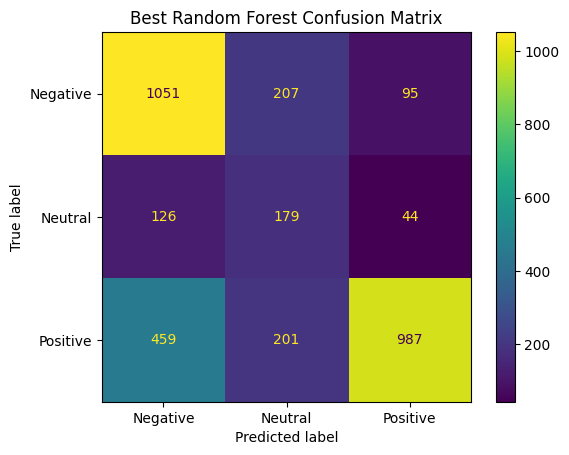

In [211]:
# Random Forest Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix=cm_best_rf, display_labels=['Negative', 'Neutral', 'Positive']).plot()
plt.title('Best Random Forest Confusion Matrix')
plt.show()

### SAVE MODEL AND VECTORIZER

In [226]:
import pickle
pickle.dump(nb_model, open('nb_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

###  MODEL DEPLOYMENT

In [232]:
from flask import Flask, request, jsonify

In [234]:
# Define a class for the prediction
class Predictor:
    def __init__(self):
        self.model = pickle.load(open('nb_model.pkl', 'rb'))
        self.vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

    def predict_sentiment(self, Reviews):
        clean_review = self.clean_text(Reviews)
        print(f"Clean Review: {clean_review}")
        vectorized_review = self.vectorizer.transform([clean_review])
        print(f"Vectorized Review: {vectorized_review.toarray()}")
        prediction = self.model.predict(vectorized_review)
        print(f"Prediction: {prediction}")
        return prediction[0]

    def clean_text(self, text):
        text = str(text)
        text = text.lower()
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        text = re.sub(r"\st", " ", text).strip()
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return " ".join(tokens) 

In [236]:
# Test the Predictor class
predictor = Predictor()
print(predictor.predict_sentiment("This is a great product!"))

Clean Review: great product
Vectorized Review: [[0. 0. 0. ... 0. 0. 0.]]
Prediction: ['positive']
positive


In [238]:
# Test the Predictor class
predictor = Predictor()
print(predictor.predict_sentiment("i won't use it!"))

Clean Review: wont use
Vectorized Review: [[0. 0. 0. ... 0. 0. 0.]]
Prediction: ['negative']
negative


In [240]:
# Test the Predictor class
predictor = Predictor()
print(predictor.predict_sentiment("i hate it!"))

Clean Review: hate
Vectorized Review: [[0. 0. 0. ... 0. 0. 0.]]
Prediction: ['negative']
negative
